# 数据集

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection


## 读取数据

In [1]:
import pandas as pd

df = pd.read_csv("/Users/zhusheng/WorkSpace/Dataset/12-sms-spam-collection/smsspamcollection/SMSSpamCollection", 
                 delimiter='\t',header=None, error_bad_lines=False)
df.head()

# \t 的意思是横向跳到下一制表符位置 

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# 垃圾短信
df[df[0] == 'spam']
# 统计垃圾邮件的数量
df[df[0] == 'spam'].count()
# 统计垃圾邮件的数量
df[df[0] == 'spam'][0].count()

747

In [3]:
# 非垃圾短信
df[df[0]=='ham'][0].count()

4825

通过上面的分析，我们看到我们的数据集包含了747个垃圾短信和4825个非垃圾短信。

## 训练数据

In [4]:
import numpy as np
import pandas as pd
# 对数据集进行特征提取和统计
from sklearn.feature_extraction.text import TfidfVectorizer
# 导入线性回归模型，用于训练、预测
from sklearn.linear_model.logistic import LogisticRegression
# train_test_split用于拆分数据集
# cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
X = df[1].values
y = df[0].values

In [6]:
# 拆分数据集，默认75%为训练集，25%为测试集
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y)

In [7]:
vec = TfidfVectorizer()

In [8]:
# 特征提取, 将句子转换为TF-idf重要性数据
X_train = vec.fit_transform(X_train_raw)
X_test = vec.transform(X_test_raw)

In [9]:
classifier = LogisticRegression()

In [10]:
# 训练模型
classifier.fit(X_train, y_train)

/Users/zhusheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# 使用模型进行预测
y_predict = classifier.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [12]:
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
# 一般用在 for 循环当中。

for i, y in enumerate(y_predict[:5]):
    print("Predict: %s, message: %s" % (y, X_test_raw[i]))

Predict: ham, message: A bloo bloo bloo I'll miss the first bowl
Predict: ham, message: I love u 2 my little pocy bell I am sorry but I love u
Predict: ham, message: No he didn't. Spring is coming early yay!
Predict: ham, message: He is world famamus....
Predict: ham, message: Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched...


## 模型评估

In [13]:
# 混淆矩阵
# 导入混淆矩阵包
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [14]:
# 样本数据
y_test = [0,0,0,0,0,1,1,1,1,1]
y_predict = [0,1,0,0,0,0,0,1,1,1]

# 混淆矩阵
confusion_matrix = confusion_matrix(y_test, y_predict)
print("confusion_matrix:", confusion_matrix)

confusion_matrix: [[4 1]
 [2 3]]


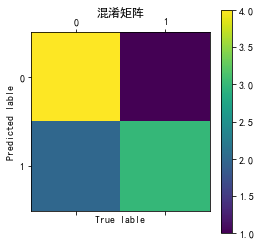

In [15]:
# 用于解决显示中文问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# plt.matshow可用于显示矩阵
plt.matshow(confusion_matrix)
# 标题
plt.title("混淆矩阵")
# 侧边的彩条
plt.colorbar()
# X轴名称
plt.xlabel('True lable')
# y轴名称
plt.ylabel('Predicted lable')
# 显示图表
plt.show()

In [16]:
# 模型评估
# 使用五折交叉验证
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])

# 准确率
accuracy = cross_val_score(classifier, X_train, y_train, cv=5)
print('Mean accuracy: %s' % np.mean(accuracy))

# 精准率
precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision:', np.mean(precision))

# 召回率
recall = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall:', np.mean(recall))

# F1-score
f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1:', np.mean(f1))


/Users/zhusheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhusheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhusheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean accuracy: 0.9559682069552651
Precision: 0.9842609469802452
Recall: 0.680389317889318
F1: 0.8042992431421598


/Users/zhusheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


predict方法就是我们最常用的预测方法，直接给出测试集的预测类别输出。

predict_proba则不同，它会给出测试集样本在各个类别上预测的概率。容易理解，predict_proba预测出的各个类别概率里的最大值对应的类别，也就是predict方法得到类别。

predict_log_proba和predict_proba类似，它会给出测试集样本在各个类别上预测的概率的一个对数转化。转化后predict_log_proba预测出的各个类别对数概率里的最大值对应的类别，也就是predict方法得到类别。